In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOChS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
'PlantVillage',
shuffle = True,
image_size = (IMAGE_SIZE, IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 16969 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)  # batch of 32 image so there are 645 len with batch of 32 image

531

In [6]:
531*32

16992

In [7]:
testdata = 0
label = ''
for image_batch, label_batch in dataset.take(1):
    print(type(image_batch))
    testdata = image_batch
    label= label_batch
    print(label_batch.numpy())
print(testdata)
print(label)

<class 'tensorflow.python.framework.ops.EagerTensor'>
[1 5 4 1 5 7 5 9 8 0 6 3 6 6 0 9 5 0 4 5 6 8 4 0 6 7 1 0 4 0 4 0]
tf.Tensor(
[[[[125. 123. 128.]
   [115. 113. 118.]
   [149. 147. 152.]
   ...
   [135. 133. 138.]
   [137. 135. 140.]
   [129. 127. 132.]]

  [[140. 138. 143.]
   [123. 121. 126.]
   [137. 135. 140.]
   ...
   [133. 131. 136.]
   [132. 130. 135.]
   [124. 122. 127.]]

  [[148. 146. 151.]
   [142. 140. 145.]
   [148. 146. 151.]
   ...
   [133. 131. 136.]
   [129. 127. 132.]
   [120. 118. 123.]]

  ...

  [[106. 101. 105.]
   [116. 111. 115.]
   [111. 106. 110.]
   ...
   [113. 105. 103.]
   [118. 110. 108.]
   [123. 115. 113.]]

  [[129. 124. 128.]
   [123. 118. 122.]
   [112. 107. 111.]
   ...
   [111. 103. 101.]
   [114. 106. 104.]
   [115. 107. 105.]]

  [[ 97.  92.  96.]
   [ 91.  86.  90.]
   [103.  98. 102.]
   ...
   [130. 122. 120.]
   [130. 122. 120.]
   [128. 120. 118.]]]


 [[[222. 218. 219.]
   [224. 220. 221.]
   [213. 209. 210.]
   ...
   [198. 193. 197.]

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[141. 148. 158.]
  [152. 159. 169.]
  [137. 144. 154.]
  ...
  [141. 149. 160.]
  [135. 143. 154.]
  [127. 135. 146.]]

 [[148. 155. 165.]
  [147. 154. 164.]
  [150. 157. 167.]
  ...
  [135. 143. 154.]
  [139. 147. 158.]
  [141. 149. 160.]]

 [[161. 168. 178.]
  [140. 147. 157.]
  [148. 155. 165.]
  ...
  [130. 138. 149.]
  [136. 144. 155.]
  [141. 149. 160.]]

 ...

 [[123. 116. 124.]
  [120. 113. 121.]
  [119. 112. 120.]
  ...
  [126. 119. 127.]
  [116. 109. 117.]
  [122. 115. 123.]]

 [[124. 117. 125.]
  [120. 113. 121.]
  [118. 111. 119.]
  ...
  [111. 104. 112.]
  [103.  96. 104.]
  [112. 105. 113.]]

 [[122. 115. 123.]
  [118. 111. 119.]
  [115. 108. 116.]
  ...
  [ 95.  88.  96.]
  [109. 102. 110.]
  [111. 104. 112.]]], shape=(256, 256, 3), dtype=float32)


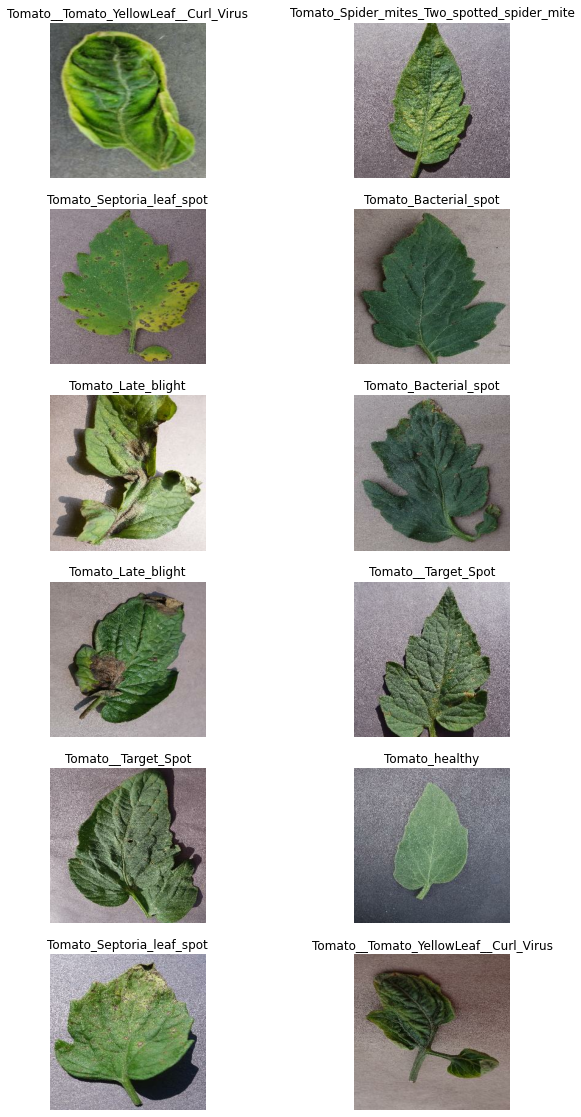

In [59]:
plt.figure(figsize= (10,20))
i=0
for image_batch, label_batch in dataset.take(12):
    ax = plt.subplot(6,2,i+1) #the figure has 6 row, 2 columns, and this plot is the ith plot.
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')
    i+=1

In [10]:
#80% ==>training
#20% ==> 10 test 10 validation

In [11]:
train_size = .80
len(dataset)*train_size

424.8

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

477

In [14]:
val_size = 0.1
len(dataset) * val_size

53.1

In [15]:
val_ds = test_ds.take(64)

In [16]:
test_ds = test_ds.skip(64)
len(test_ds)

413

In [67]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, shuffle =True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    test_ds = ds.skip(train_size).take(val_size)
    val_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [68]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [69]:
len(train_ds)

424

In [70]:
len(val_ds)

54

In [71]:
len(test_ds)

53

In [23]:
len(train_ds)

424

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentaion = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    resize_and_rescale,
    data_augmentaion,
    
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
    
])

model.build(input_shape = input_shape)

model.summary()

In [26]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
base_model = InceptionV3(weights= 'imagenet', include_top=False, input_shape=(input_shape))

In [27]:
# Freezing pretrained layers
for layer in base_model.layers:
    layer.trainable=False

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentaion,
    
    base_model,
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(10, activation = 'softmax')
    
])

model.build(input_shape)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (32, 73728)               0         
                                                                 
 dense (Dense)               (32, 128)                 9437312   
                                                                 
 dense_1 (Dense)             (32, 64)                  8256      
                                                                 
 dense_2 (Dense)             (32, 10)                 

In [30]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics = ['accuracy']
)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
e = EarlyStopping(patience= 5, monitor = 'accuracy', restore_best_weights=True)

In [32]:
history = model.fit(
    train_ds,
    epochs = EPOChS,
    batch_size= BATCH_SIZE,
    verbose =1,
    validation_data= val_ds,
    callbacks=[e]
)

Epoch 1/50
424/424 [==============================] - 470s 1s/step - loss: 1.2355 - accuracy: 0.6809 - val_loss: 0.5130 - val_accuracy: 0.8420
Epoch 2/50
424/424 [==============================] - 397s 935ms/step - loss: 0.5757 - accuracy: 0.8198 - val_loss: 0.5323 - val_accuracy: 0.8281
Epoch 3/50
424/424 [==============================] - 384s 906ms/step - loss: 0.4584 - accuracy: 0.8491 - val_loss: 0.4427 - val_accuracy: 0.8443
Epoch 4/50
424/424 [==============================] - 400s 945ms/step - loss: 0.4076 - accuracy: 0.8662 - val_loss: 0.3641 - val_accuracy: 0.8837
Epoch 5/50
424/424 [==============================] - 416s 982ms/step - loss: 0.3655 - accuracy: 0.8776 - val_loss: 0.3441 - val_accuracy: 0.8843
Epoch 6/50
424/424 [==============================] - 414s 977ms/step - loss: 0.3456 - accuracy: 0.8861 - val_loss: 0.3706 - val_accuracy: 0.8773
Epoch 7/50
424/424 [==============================] - 398s 940ms/step - loss: 0.3069 - accuracy: 0.8984 - val_loss: 0.2675 - va

In [35]:
scores = model.evaluate(test_ds)

53/53 [==============================] - 81s 738ms/step - loss: 0.1660 - accuracy: 0.9469


In [36]:
scores

[0.16599446535110474, 0.9469339847564697]

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

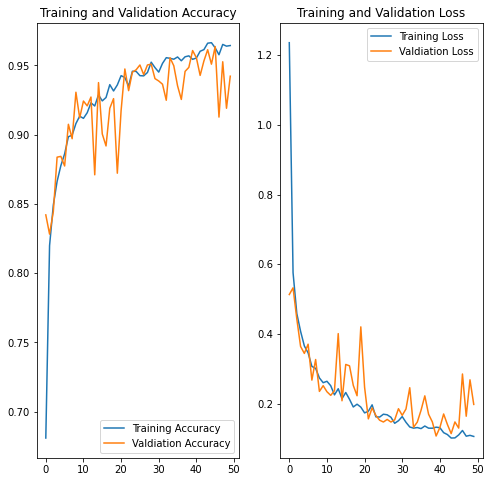

In [38]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(val_acc, label = 'Valdiation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Valdiation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
for images_batch, lables_batch in test_ds.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = lables_batch[0]
    
    print('first image to predict')
    plt.imshow(first_image)
    print('first image actural label:', class_names[first_label])
    
    batch_prediction = model.predict(image_batch);
    print(class_names[np.argmax(batch_prediction[0])])

In [45]:
def predict_(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # create a batch
    
    predictions = model.predict(img_array)
    
    print('===============================')
    print(predictions)
    print('***', predictions.shape)
    print('=================================')
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]),2)
    return predicted_class, confidence 

1/1 [==============================] - 1s 1s/step
[[3.3801291e-02 1.9813852e-01 6.3564885e-01 9.4515525e-02 1.0139545e-03
  1.0296435e-02 2.4016907e-02 2.5389122e-03 1.8941130e-06 2.7828610e-05]]
*** (1, 10)
1/1 [==============================] - 0s 53ms/step
[[4.2231996e-09 1.7026407e-12 6.9821551e-11 4.9200612e-11 3.7269157e-10
  6.5530017e-18 1.1842225e-15 1.0000000e+00 1.2666243e-14 1.5068044e-17]]
*** (1, 10)
1/1 [==============================] - 0s 52ms/step
[[1.0861555e-17 2.5096423e-13 8.3185486e-16 5.3104163e-11 8.3694717e-17
  3.4178743e-12 7.5285901e-14 1.0000000e+00 1.1990831e-14 1.4178789e-17]]
*** (1, 10)
1/1 [==============================] - 0s 57ms/step
[[2.2512552e-08 8.1214212e-06 8.9713723e-07 4.5260903e-04 3.9868769e-07
  2.9838014e-07 7.9001509e-08 2.2096749e-08 9.9953759e-01 3.4761508e-10]]
*** (1, 10)
1/1 [==============================] - 0s 57ms/step
[[1.3358578e-10 8.4308525e-08 1.4194862e-12 2.3314135e-06 7.2703767e-07
  6.4750184e-06 1.8708072e-07 4.853083

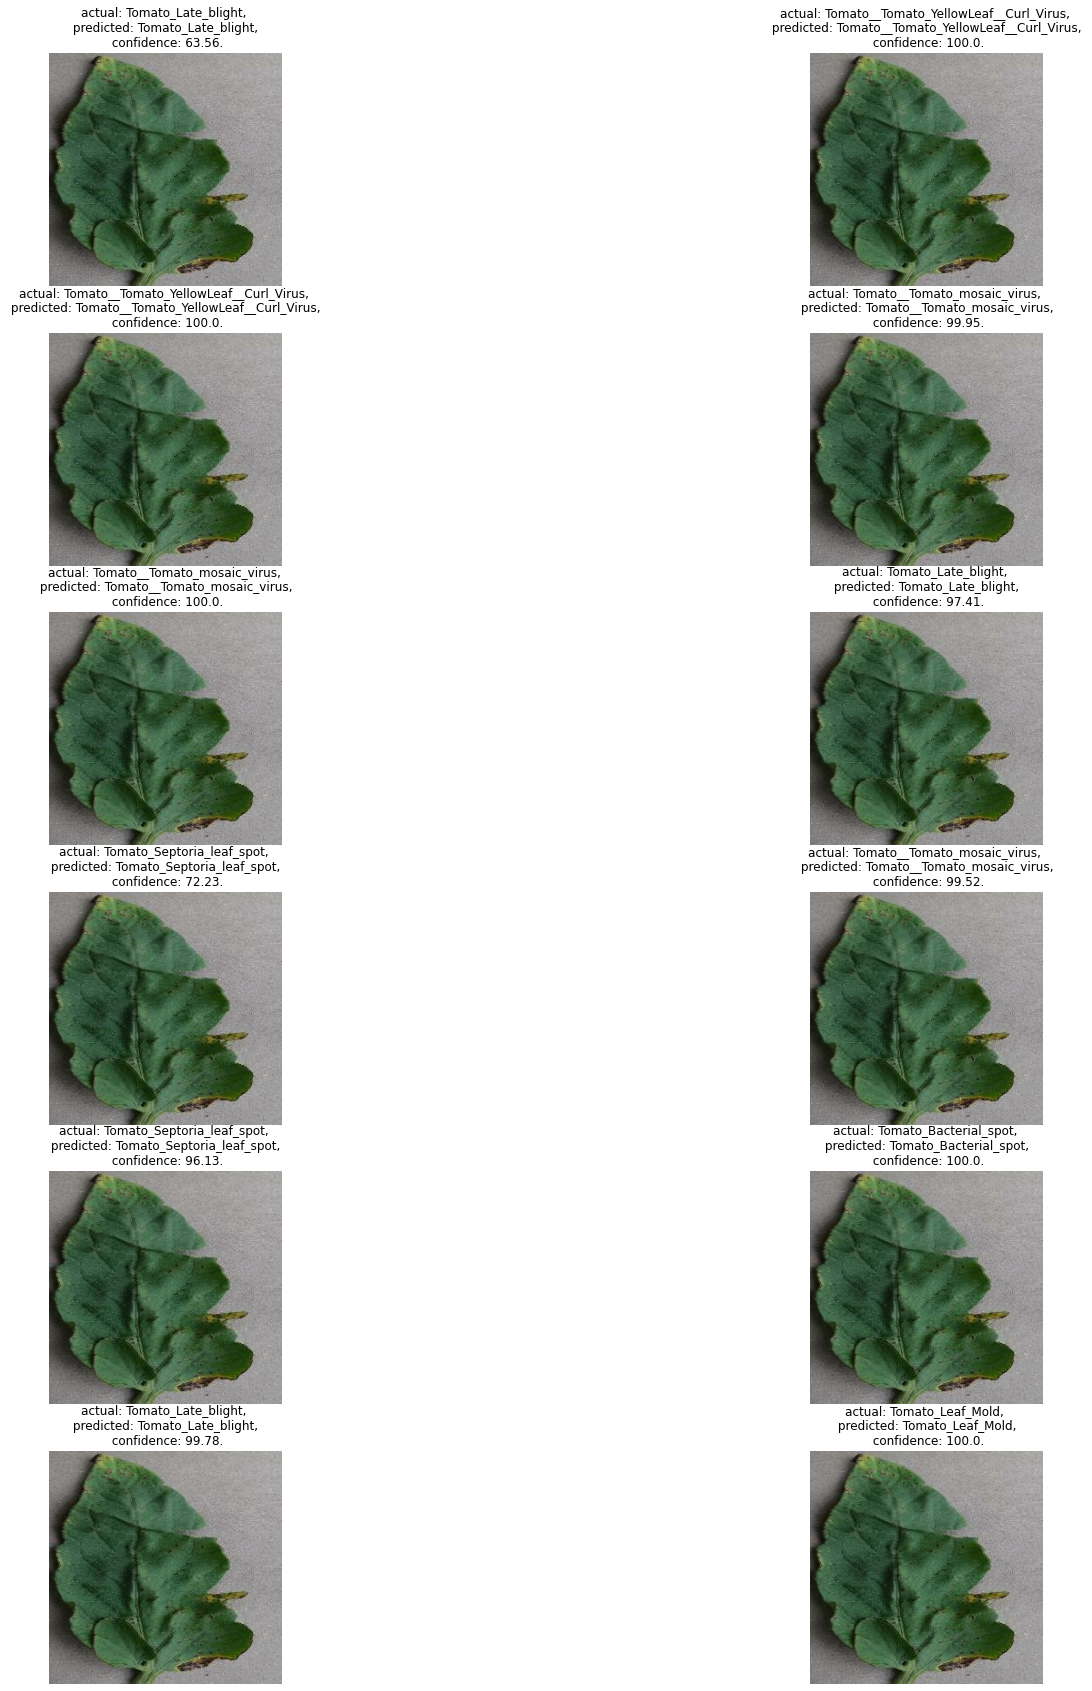

In [47]:
plt.figure(figsize= (25,30))
for images, labels in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(6,2,i+1) #the figure has 6 row, 2 columns, and this plot is the ith plot.
        plt.imshow(image_batch[0].numpy().astype('uint8'))
        
        predicted_class, confidence = predict_(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f'actual: {actual_class}, \n predicted: {predicted_class}, \n confidence: {confidence}.')
        
        plt.axis('off')

In [50]:
model.save('finalmodel.h5')


In [ ]:
"""import os
model_version = max([int(i) for i in os.listdir("models") + [0]]) +1
model.save(f'models/{model_version}')"""

In [52]:
"""from keras import models 
modeltest = models.load_model('finalmodel.h5')"""

In [56]:
"""predictions = modeltest.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * np.max(predictions[0]),2)"""

'predictions = modeltest.predict(img_array)\npredicted_class = class_names[np.argmax(predictions[0])]\nconfidence = round(100 * np.max(predictions[0]),2)'

In [ ]:
"""from keras import models   
model1 = models.load_model('./models/1/saved_model.pb')"""